In [172]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import queue
import random
import time

In [173]:
def Generar_Tablero():
    matriz1 = [
            [2,0,0,1,0,1,1,0,0],
            [1,1,0,1,0,0,0,0,1],
            [0,0,0,1,0,0,1,0,0],
            [0,1,0,1,0,0,1,0,0],
            [0,1,0,1,0,0,1,0,0],
            [0,0,0,0,0,0,0,0,0],
            [0,0,0,0,1,1,0,1,0],
            [0,1,1,0,0,0,0,1,0],
            [0,0,0,1,0,0,0,1,3]
          ]
    return matriz1

In [174]:
def Generar_Tablero_2():
    matriz1 = [
            [2,0,1],
            [0,1,1],
            [0,0,3]
          ]
    return matriz1

In [175]:
def dibujarTablero(matriz, id=True):
  plt.figure(figsize=(np.size(matriz,0),np.size(matriz,1)))
  sns.heatmap(matriz, linewidths=.1, linecolor='white', annot=False, cmap='magma', yticklabels=False, xticklabels=False, cbar=False, square=True);
  sns.heatmap(matriz, linewidths=.1, linecolor='white', annot=id, cmap='magma', yticklabels=False, xticklabels=False, cbar=False, square=True,
  mask=np.array(matriz)<0);
  plt.show()

In [176]:
def Pinta_Camino(matriz, path = ""):
    for x, pos in enumerate(matriz[0]):
        if pos == 2:
            start = x

    i = start
    j = 0
    pos = set()
    for move in path:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1
        pos.add((j, i))
    
    for j, row in enumerate(matriz):
        for i, col in enumerate(row):
            if (j, i) in pos:
              matriz[j][i] = 2
        print()

In [177]:
def valid(matriz, moves):
    for x, pos in enumerate(matriz[0]):
        if pos == 2:
            start = x

    i = start
    j = 0
    for move in moves:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1

        if not(0 <= i < len(matriz[0]) and 0 <= j < len(matriz)):
            return False
        elif (matriz[j][i] == 1):
            return False
    return True

In [178]:
def findEnd(matriz, moves):
    for x, pos in enumerate(matriz[0]):
        if pos == 2:
          start = x
    i = start
    j = 0
    for move in moves:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1

    if matriz[j][i] == 3:
        print("Found: " + moves)
        Pinta_Camino(matriz, moves)
        return True

    return False

In [179]:
def Pinta_Camino_jugador_segundo(matriz, path = ""):
    for x, pos in enumerate(matriz[8]):
        if pos == 3:
            start = x

    i = start
    j = 8
    pos = set()
    for move in path:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1
        pos.add((j, i))
    
    for j, row in enumerate(matriz):
        for i, col in enumerate(row):
            if (j, i) in pos:
              matriz[j][i] = 3
        print()

In [180]:
def valid_jugador_segundo(matriz, moves):
    for x, pos in enumerate(matriz[8]):
        if pos == 3:
            start = x

    i = start
    j = 8
    for move in moves:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1

        if not(0 <= i < len(matriz[0]) and 0 <= j < len(matriz)):
            return False
        elif (matriz[j][i] == 1):
            return False   

    return True

In [181]:
def findEnd_segundo_jugador(matriz, moves):
  for x, pos in enumerate(matriz[8]):
    if pos == 3:
      start = x

  i = start
  j = 8

  for move in moves:
    if move == "L":
      i -= 1

    elif move == "R":
      i += 1

    elif move == "U":
      j -= 1

    elif move == "D":
      j += 1

  if matriz[j][i] == 2:
    print("Found: " + moves)
    Pinta_Camino_jugador_segundo(matriz, moves)
    return True
  return False

In [182]:
def mesure_time(main):
  start=time.time()
  main()
  end=time.time()
  return end-start

In [183]:
def main_1():
  matriz = Generar_Tablero()
  #-----------Primer Peon
  nums = queue.Queue()
  nums.put("")
  add = ""

  while not findEnd(matriz, add): 
      add = nums.get()
      for j in ["L", "R", "U", "D"]:
          put = add + j
          if valid(matriz, put):
              nums.put(put)


  dibujarTablero(matriz)

In [184]:
def main_2():
  matriz2 = Generar_Tablero_2()
  nums = queue.Queue()
  nums.put("")
  add = ""

  while not findEnd(matriz2, add): 
      add = nums.get()
      for j in ["L", "R", "U", "D"]:
          put = add + j
          if valid(matriz2, put):
              nums.put(put)

  dibujarTablero(matriz2)

Found: DDRR





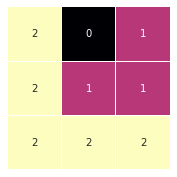

El tiempo es  0.07239842414855957
Found: RRDDDDDRRRRRRDDD











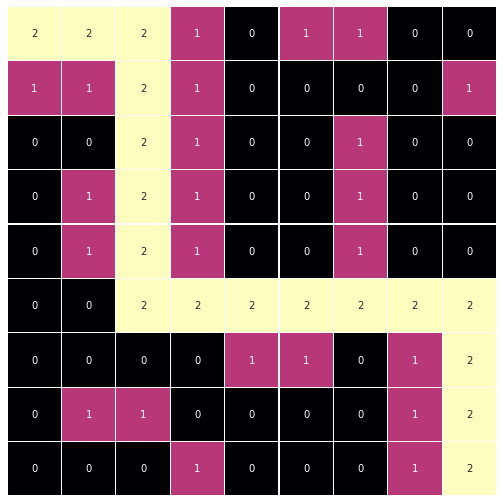

El tiempo es  5.24133825302124


In [185]:
print("El tiempo es ",mesure_time(main_2))
print("El tiempo es ",mesure_time(main_1))